# Table of Contents

### [Packages install](#libraries_install)
### [Problem Statement](#problem_statement)
### [Data Input](#data_input)
### [Data understanding, cleaning and EDA](#EDA)
### [Data Preparation for modelling](#DATA_PREP)
### [Feature Selection](#feature_select)
### [Residual analysis](#residual_analysis)
### [Inference](#inference)

# Packages install <a id='libraries_install'></a>

In [1]:
import sys
print(sys.executable)

C:\Users\I568508\Anaconda3\envs\learning\python.exe


In [2]:
import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE



import warnings
warnings.filterwarnings('ignore')

<a id='problem_statement'></a>
# Problem Statement

- A bicycle rental compary aspires to understand the demand for shared bikes among the people.
- They want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
        - Which variables are significant in predicting the demand for shared bikes.
        - How well those variables describe the bike demands
- Create model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. Further, the model will be a good way for management to understand the demand dynamics of a new market.

<a id='data_input'></a>
# Data input

**Data information**
- Dataset:  Rental bike demand
- File Type: .csv
- Description: Dataset is about past rental bike demand. Demand for every day with various factors on the particular day are mentioned. 
- Data date range: 1st January 2018 to 31 Feb 2019
- Each row is a separate day with various features like weather, holiday associated with it and demand for rental bikes for casual, registered users and total demand (casual + registered) has been mentioned.
- Number of rows: 730

In [3]:
df= pd.read_csv("day.csv")
print("Data size: ",df.shape)
df

Data size:  (730, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


<a id='EDA'></a>
# Data understanding, preparation and visualization

In [4]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data cleaning
- Dataset has 16 columns. All of them may not be useful for business objective.
- Delete irrelevant columns.
        - Instant and dteday should be removed as they have unique value of each record and thus dont add significant. Casual and registered columns cannot be used as predictor variables as this data will not be available for demand prediction. 
- Rename columns to more understandable names.
        - Most columns have understandable names.

In [5]:
#Removing irrelevant columns for business objective

drop_cols = ['instant', 'dteday', 'casual', 'registered']

df.drop(drop_cols, axis=1, inplace=True)
print(df.shape)
df.head()

(730, 12)


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [6]:
#Rename columns

rename_cols_dict = {'cnt': 'demand',
        'atemp': 'feel_temp'
       }

df.rename(columns=rename_cols_dict,inplace=True)

-  Check which columns have missing values

In [7]:
df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
feel_temp     0
hum           0
windspeed     0
demand        0
dtype: int64

In [8]:
df.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
feel_temp     float64
hum           float64
windspeed     float64
demand          int64
dtype: object

- no missing values. 

Features from 'season' to 'weathersit' eventhough have dtype as int64, are categorical actually.All remaining features are numerical in nature.

In [9]:
#Numerical and categorical features

numeric_feat = ['temp', 'feel_temp', 'hum', 'windspeed', 'demand']
cat_feat = ['season', 'yr', 'mnth', 'holiday','weekday', 'workingday', 'weathersit']

**Data visualization**
- Understand relationship of numeric variables with target variable. This should be done as we are trying linear regression. Linear regression would work best if there is linear correlation between dependent and independent features.This can be done by visual analysis of scatterplots and correlation heatmaps.
- Check for multicollinearlity to check if dependency between independent variables.


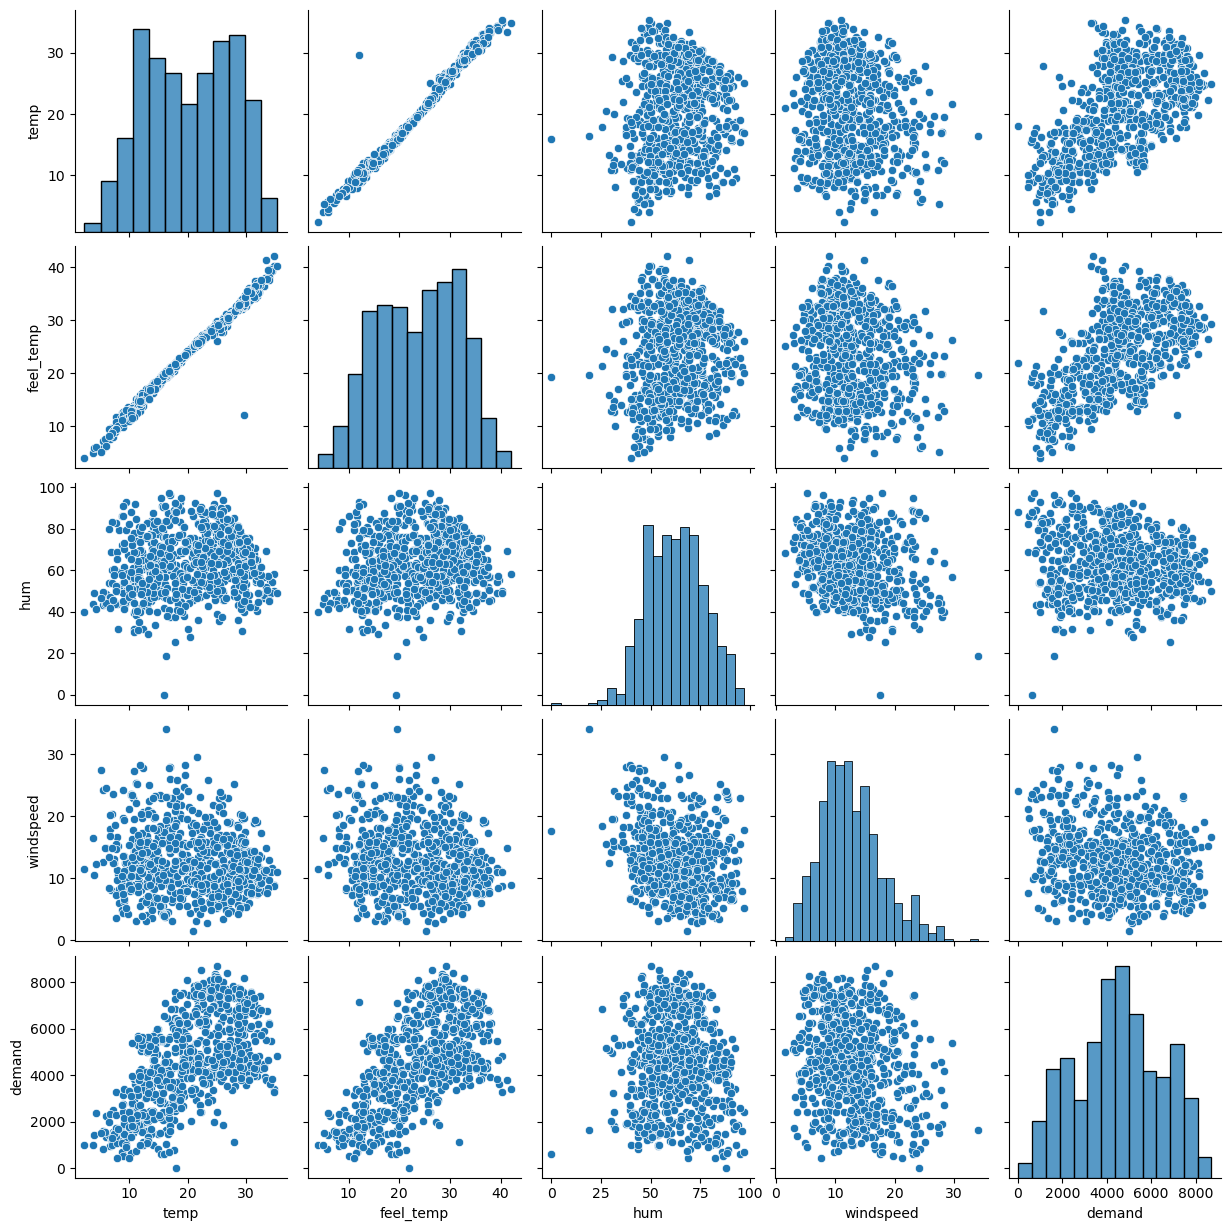

In [10]:
sns.pairplot(df[numeric_feat])

- We can see that there is some linear relationship between demand and temp, feel_temp. So linear regression can be used.

<AxesSubplot:>

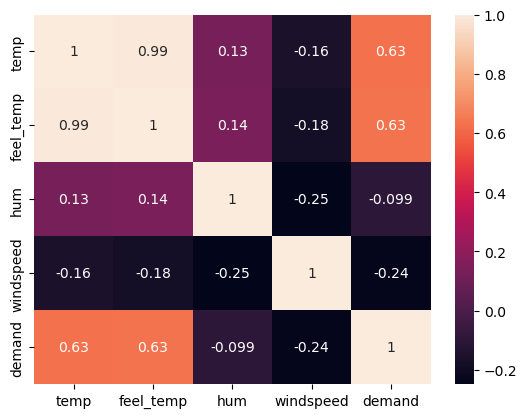

In [11]:
sns.heatmap(df[numeric_feat].corr(), annot=True)

- Categorical features visualization

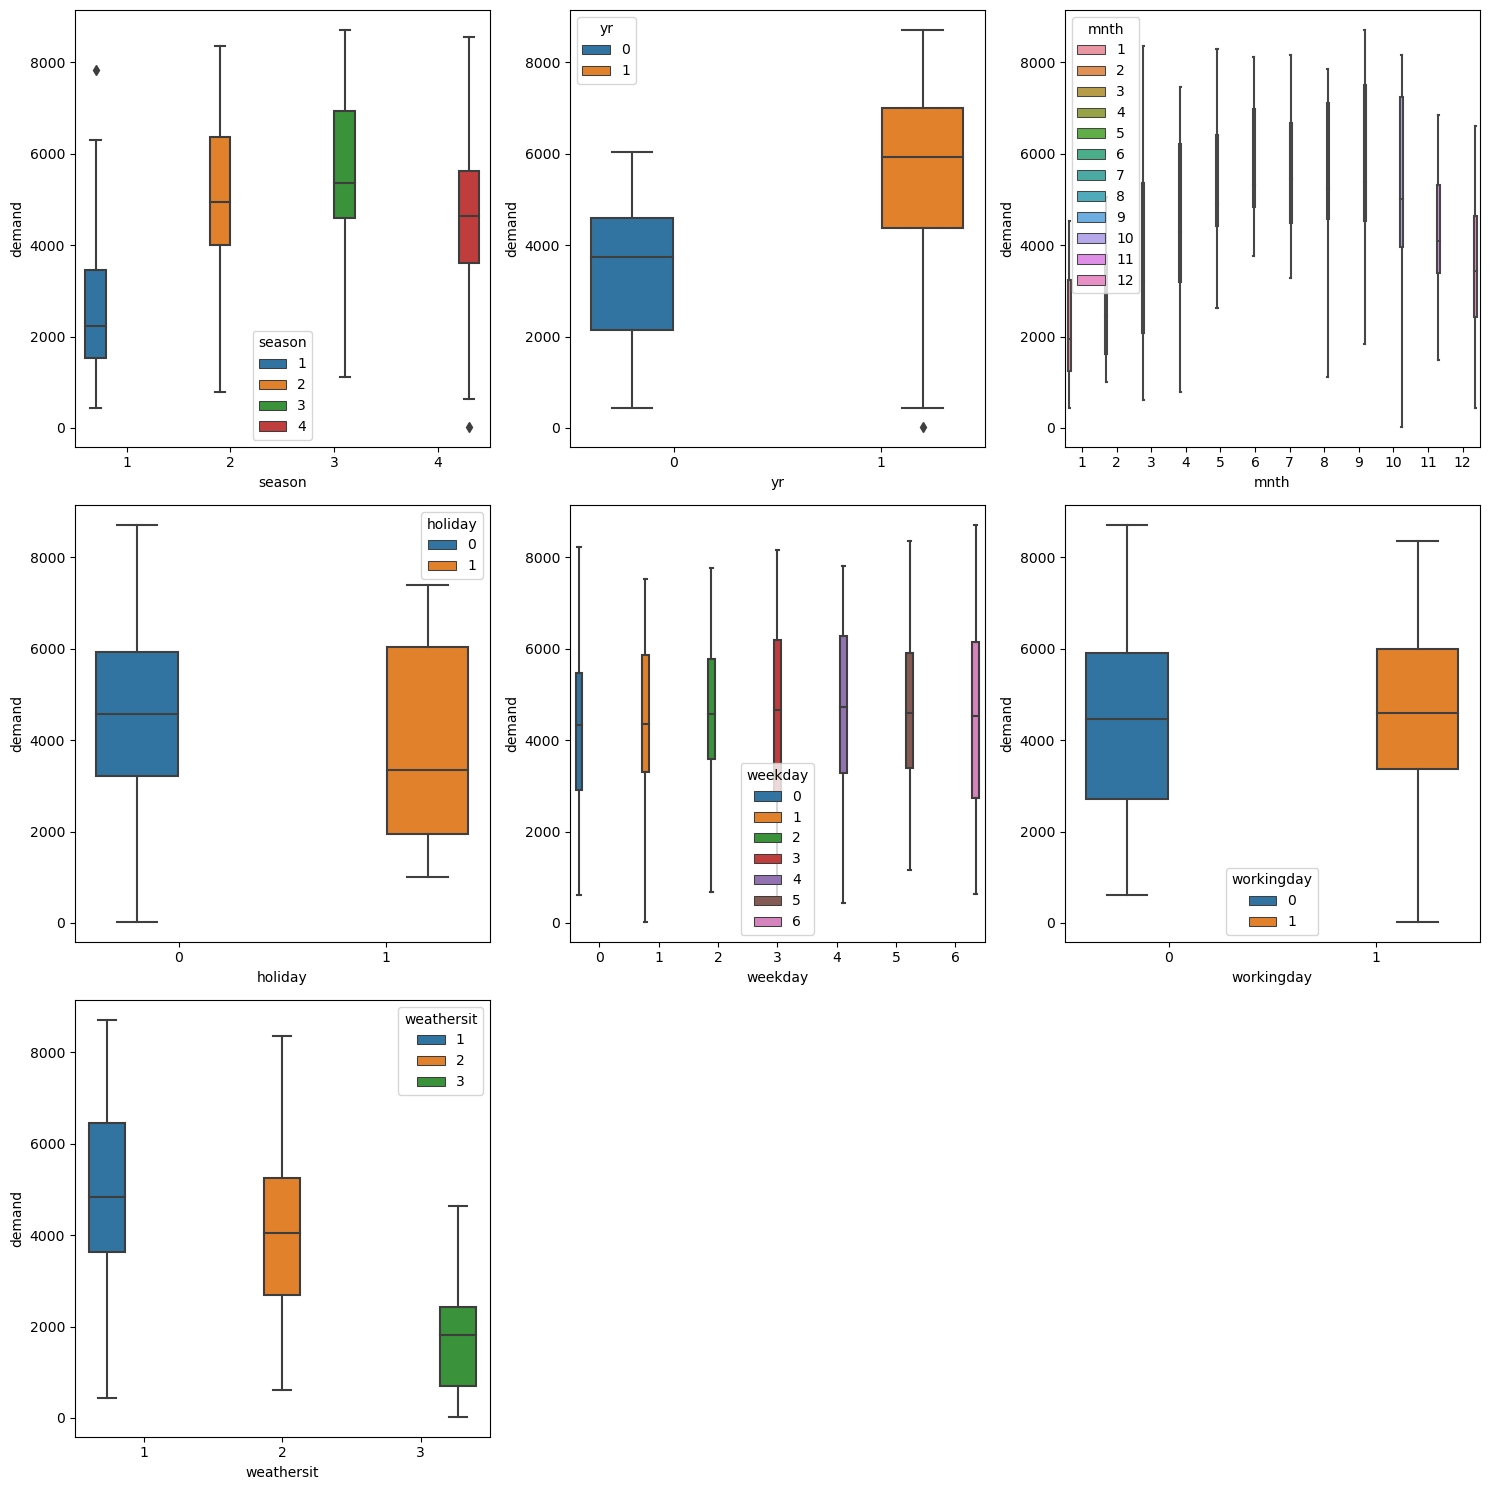

In [12]:
cols = 3
rows = 3

fig = plt.figure(figsize=(cols*5, rows*5))
for i, col in enumerate(cat_feat):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.boxplot(x =df[col], y= df['demand'], ax = ax, hue = df[col])
    
fig.tight_layout()  
plt.show()

- We can see, in 2019, demand is more. 
- Demand in general decreases with increase in weathersit value. 
- Demand is considerably low in season 1.

<a id='DATA_PREP'></a>
# Data preparation for modelling
- Categorical variables will be converted to numeric using dummy variable creation,
- We dont want testing data to learn anything from train data so we will first do train-test split and the perform and then perform rescaling. 

In [13]:
df= pd.get_dummies(df, columns=cat_feat, drop_first=True)

In [14]:
from sklearn.model_selection import train_test_split
X = df.drop('demand',axis=1)
y = df['demand']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- We will scale numeric variables using Min-max scaler here as there are no outliers present. 

In [15]:
numeric_feat =['temp', 'feel_temp', 'hum', 'windspeed']
cat_feat = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [16]:
scaler = MinMaxScaler()

X_train[numeric_feat] = scaler.fit_transform(X_train[numeric_feat])
X_test[numeric_feat] = scaler.transform(X_test[numeric_feat])

<a id='feature_select'></a>
# Feature selection

Training dataset has 29 features. so it is better to consider all features at once and delete features which do not add value.

We can select top 'n' features using RFE i.e. recursive feature elimination. then manually reduce features by inspection of VIF and p-value

In [17]:
X_train.shape

(584, 29)

**RFE for feature removal**

In [18]:
#We are using RFE here to select top 15 features.

# Initialize the transformer
rfe = RFE(estimator=LinearRegression(), n_features_to_select=15)

# Fit to the training data
rfe.fit(X_train, y_train)


#To find which features are selected
X_train_transformed = X_train.loc[:, rfe.support_]

print("Features selected are: ",X_train_transformed.shape[1],"\n",list(X_train_transformed.columns))

Features selected are:  15 
 ['temp', 'feel_temp', 'hum', 'windspeed', 'season_2', 'season_3', 'season_4', 'yr_1', 'mnth_9', 'mnth_11', 'mnth_12', 'weekday_6', 'workingday_1', 'weathersit_2', 'weathersit_3']


In [ ]:
# #Transform X_train and fit linear regression model

# #Create object of Linear regression class
# model = LinearRegression()

# # Find out train data which after feature elimination
# X_train_transformed = X_train.loc[:, rfe.support_]
# model.fit(X_train_transformed, y_train)

**VIF, p value**

In [20]:
print(X_train_transformed.shape)
X_train_transformed.head()

(584, 15)


,temp,feel_temp,hum,windspeed,season_2,season_3,season_4,yr_1,mnth_9,mnth_11,mnth_12,weekday_6,workingday_1,weathersit_2,weathersit_3
247,0.765327,0.717455,0.814513,0.475900,0,1,0,0,1,0,0,0,0,1,0
335,0.317788,0.331261,0.644911,0.195963,0,0,1,0,0,0,1,0,1,0,0
702,0.519232,0.511907,0.756118,0.379454,0,0,1,1,0,0,1,0,1,0,0
440,0.566998,0.559152,0.778874,0.220845,0,0,0,1,0,0,0,1,0,1,0
136,0.626185,0.603102,0.863461,0.637592,1,0,0,0,0,0,0,0,1,1,0


In [21]:
#build model with all variables

X_train_sm = sm.add_constant(X_train_transformed)

#Create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 demand   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     193.8
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          6.69e-212
Time:                        08:43:48   Log-Likelihood:                -4725.0
No. Observations:                 584   AIC:                             9482.
Df Residuals:                     568   BIC:                             9552.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1694.6244    246.994      6.861      0.000    1209.492    2179.757
temp          1947.7984   1993.370      0.977      0.329   -1967.478    5863.074
feel_temp     1945.9787   2104.697      0.925      0.356   -2187.960    6079.918
hum          -1372.2815    316.130     -4.341      0.000   -1993.207    -751.356
windspeed    -1141.8982    198.854     -5.742      0.000   -1532.478    -751.319
season_2      1241.2835    131.497      9.440      0.000     983.003    1499.564
season_3       822.4381    179.316      4.587      0.000     470.236    1174.641
season_4      1843.7398    133.169     13.845      0.000    1582.176    2105.304
yr_1          1974.7738     67.546     29.236      0.000    1842.103    2107.444
mnth_9         691.9850    131.557      5.260      0.000     433.586     950.383
mnth_11       -638.5276    152.756     -4.180      0.000    -938.562    -338.493
mnth_12       -505.6204    144.614     -3.496      0.001    -789.664    -221.576
weekday_6      521.2819    117.236      4.446      0.000     291.012     751.552
workingday_1   422.6697     88.333      4.785      0.000     249.170     596.169
weathersit_2  -433.2939     88.459     -4.898      0.000    -607.040    -259.547
weathersit_3 -2062.9931    217.664     -9.478      0.000   -2490.518   -1635.468
==============================================================================
Omnibus:                       90.357   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.248
Skew:                          -0.785   Prob(JB):                     8.25e-52
Kurtosis:                       5.684   Cond. No.                         160.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
#Creating dataframe where every feature and its corresponding VIF is mentioned

vif = pd.DataFrame()
vif['features'] = X_train_transformed.columns
vif['VIF'] = [variance_inflation_factor(X_train_transformed, i) for i in range(X_train_transformed.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif=vif.sort_values(by = 'VIF', ascending=False)
vif

,features,VIF
1,feel_temp,1299.79
0,temp,1286.78
2,hum,19.23
5,season_3,7.68
3,windspeed,4.96
12,workingday_1,4.42
6,season_4,4.10
4,season_2,3.90
13,weathersit_2,2.17
7,yr_1,2.03


# Feature dropping sequence:
1. High VIF high P - drop it first
2. High P low VIF - drop second
3. Low P high VIF - drop third
4. Low VIF low P - don’t drop


-Temperature and feel_temp both have high p value and high VIF. Both are interrelated to each other. Will remove feel_temp field.

In [23]:
X_train_transformed.drop(columns='feel_temp', inplace=True)
X_train_transformed.head()

,temp,hum,windspeed,season_2,season_3,season_4,yr_1,mnth_9,mnth_11,mnth_12,weekday_6,workingday_1,weathersit_2,weathersit_3
247,0.765327,0.814513,0.475900,0,1,0,0,1,0,0,0,0,1,0
335,0.317788,0.644911,0.195963,0,0,1,0,0,0,1,0,1,0,0
702,0.519232,0.756118,0.379454,0,0,1,1,0,0,1,0,1,0,0
440,0.566998,0.778874,0.220845,0,0,0,1,0,0,0,1,0,1,0
136,0.626185,0.863461,0.637592,1,0,0,0,0,0,0,0,1,1,0


In [24]:
#build model with all variables

X_train_sm = sm.add_constant(X_train_transformed)

#Create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 demand   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     207.6
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          6.97e-213
Time:                        08:44:28   Log-Likelihood:                -4725.4
No. Observations:                 584   AIC:                             9481.
Df Residuals:                     569   BIC:                             9546.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1705.8624    246.663      6.916      0.000    1221.381    2190.344
temp          3770.8383    292.880     12.875      0.000    3195.581    4346.096
hum          -1333.0466    313.229     -4.256      0.000   -1948.272    -717.821
windspeed    -1187.4012    192.644     -6.164      0.000   -1565.780    -809.022
season_2      1248.6682    131.238      9.515      0.000     990.898    1506.438
season_3       810.3903    178.819      4.532      0.000     459.165    1161.616
season_4      1856.0461    132.485     14.009      0.000    1595.826    2116.266
yr_1          1976.9956     67.495     29.291      0.000    1844.426    2109.565
mnth_9         684.9070    131.318      5.216      0.000     426.980     942.834
mnth_11       -637.1714    152.729     -4.172      0.000    -937.153    -337.190
mnth_12       -501.8965    144.540     -3.472      0.001    -785.793    -218.000
weekday_6      524.1260    117.181      4.473      0.000     293.966     754.286
workingday_1   427.2088     88.185      4.844      0.000     254.000     600.417
weathersit_2  -441.7318     87.976     -5.021      0.000    -614.529    -268.935
weathersit_3 -2093.6463    215.097     -9.733      0.000   -2516.128   -1671.165
==============================================================================
Omnibus:                       87.187   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.765
Skew:                          -0.760   Prob(JB):                     9.46e-50
Kurtosis:                       5.639   Cond. No.                         21.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
#Creating dataframe where every feature and its corresponding VIF is mentioned

vif = pd.DataFrame()
vif['features'] = X_train_transformed.columns
vif['VIF'] = [variance_inflation_factor(X_train_transformed, i) for i in range(X_train_transformed.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif=vif.sort_values(by = 'VIF', ascending=False)
vif

,features,VIF
0,temp,26.20
1,hum,18.05
4,season_3,7.63
2,windspeed,4.61
11,workingday_1,4.40
5,season_4,4.06
3,season_2,3.89
12,weathersit_2,2.13
6,yr_1,2.02
8,mnth_11,1.86


Now, all variables have 0 p-values, i.e. all are significant. However, some variables still have considerably high VIF. That means these can be easily explained by other features. 

Temp, hum is important variable while riding bike. It must be explained by other variables like season_3, windspeed. Will remove season_3 and check again.

In [26]:
X_train_transformed.drop(columns='season_3', inplace=True)

#build model with all variables

X_train_sm = sm.add_constant(X_train_transformed)

#Create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 demand   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     214.6
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          1.08e-209
Time:                        08:47:01   Log-Likelihood:                -4735.8
No. Observations:                 584   AIC:                             9500.
Df Residuals:                     570   BIC:                             9561.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1580.4073    249.270      6.340      0.000    1090.807    2070.008
temp          4857.5864    171.009     28.405      0.000    4521.701    5193.472
hum          -1457.9821    317.315     -4.595      0.000   -2081.232    -834.732
windspeed    -1196.3015    195.907     -6.106      0.000   -1581.090    -811.513
season_2       794.7163     86.234      9.216      0.000     625.342     964.091
season_4      1473.3134    103.814     14.192      0.000    1269.409    1677.217
yr_1          1957.1102     68.497     28.572      0.000    1822.574    2091.647
mnth_9         843.6819    128.709      6.555      0.000     590.881    1096.483
mnth_11       -468.1415    150.622     -3.108      0.002    -763.983    -172.300
mnth_12       -406.2107    145.419     -2.793      0.005    -691.834    -120.588
weekday_6      541.2390    119.111      4.544      0.000     307.290     775.188
workingday_1   428.8078     89.683      4.781      0.000     252.658     604.958
weathersit_2  -423.9251     89.381     -4.743      0.000    -599.482    -248.368
weathersit_3 -2020.1126    218.129     -9.261      0.000   -2448.548   -1591.677
==============================================================================
Omnibus:                       71.533   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.577
Skew:                          -0.710   Prob(JB):                     4.03e-32
Kurtosis:                       4.981   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
#Creating dataframe where every feature and its corresponding VIF is mentioned

vif = pd.DataFrame()
vif['features'] = X_train_transformed.columns
vif['VIF'] = [variance_inflation_factor(X_train_transformed, i) for i in range(X_train_transformed.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif=vif.sort_values(by = 'VIF', ascending=False)
vif

,features,VIF
1,hum,16.86
0,temp,8.55
2,windspeed,4.57
10,workingday_1,4.39
4,season_4,2.42
11,weathersit_2,2.11
5,yr_1,2.01
7,mnth_11,1.76
9,weekday_6,1.71
3,season_2,1.64


Humidity still has high value of VIF. Will remove it as it is explained by all other variables.

In [28]:
X_train_transformed.drop(columns='hum', inplace=True)

#build model with all variables

X_train_sm = sm.add_constant(X_train_transformed)

#Create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 demand   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     222.9
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          2.15e-206
Time:                        08:47:41   Log-Likelihood:                -4746.4
No. Observations:                 584   AIC:                             9519.
Df Residuals:                     571   BIC:                             9576.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          710.3967    164.949      4.307      0.000     386.415    1034.378
temp          4701.3879    170.522     27.570      0.000    4366.460    5036.316
windspeed     -959.4712    192.305     -4.989      0.000   -1337.182    -581.760
season_2       774.8297     87.628      8.842      0.000     602.716     946.943
season_4      1406.4006    104.582     13.448      0.000    1200.989    1611.812
yr_1          2001.6892     68.990     29.014      0.000    1866.185    2137.194
mnth_9         761.4727    129.684      5.872      0.000     506.756    1016.189
mnth_11       -454.7164    153.223     -2.968      0.003    -755.665    -153.768
mnth_12       -464.6792    147.391     -3.153      0.002    -754.173    -175.185
weekday_6      555.9130    121.146      4.589      0.000     317.966     793.860
workingday_1   441.9822     91.202      4.846      0.000     262.849     621.115
weathersit_2  -662.5565     74.014     -8.952      0.000    -807.930    -517.183
weathersit_3 -2452.5762    200.213    -12.250      0.000   -2845.821   -2059.332
==============================================================================
Omnibus:                       65.886   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.572
Skew:                          -0.661   Prob(JB):                     1.63e-29
Kurtosis:                       4.923   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
#Creating dataframe where every feature and its corresponding VIF is mentioned

vif = pd.DataFrame()
vif['features'] = X_train_transformed.columns
vif['VIF'] = [variance_inflation_factor(X_train_transformed, i) for i in range(X_train_transformed.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif=vif.sort_values(by = 'VIF', ascending=False)
vif

,features,VIF
0,temp,5.17
1,windspeed,4.07
9,workingday_1,4.02
3,season_4,2.31
4,yr_1,2.00
6,mnth_11,1.74
2,season_2,1.63
8,weekday_6,1.62
10,weathersit_2,1.56
7,mnth_12,1.33


Now, all variables seem 0 p-value i.e. they all are significant. Also, VIF are considerably low. Hence, we will consider these features now and train model on these features.

In [33]:
Final_features = X_train_transformed.columns
print("Training data: \n")

X_train_transformed

Training data: 



,temp,windspeed,season_2,season_4,yr_1,mnth_9,mnth_11,mnth_12,weekday_6,workingday_1,weathersit_2,weathersit_3
247,0.765327,0.475900,0,0,0,1,0,0,0,0,1,0
335,0.317788,0.195963,0,1,0,0,0,1,0,1,0,0
702,0.519232,0.379454,0,1,1,0,0,1,0,1,0,0
440,0.566998,0.220845,0,0,1,0,0,0,1,0,1,0
136,0.626185,0.637592,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.405237,0.620712,0,0,0,0,0,0,0,0,0,0
106,0.495350,0.702966,1,0,0,0,0,0,0,0,0,0
270,0.717562,0.315685,0,1,0,1,0,0,0,1,1,0
435,0.507811,0.463438,0,0,1,0,0,0,0,1,0,0


<a id='residual_analysis'></a>
# Residual analysis

In [34]:
Linear_reg_model = LinearRegression()

Linear_reg_model.fit(X_train[Final_features], y_train)
y_pred =Linear_reg_model.predict(X_test[Final_features])

<AxesSubplot:title={'center':'Scatterplot between y_pred and y_test'}, xlabel='y_test', ylabel='y_pred'>

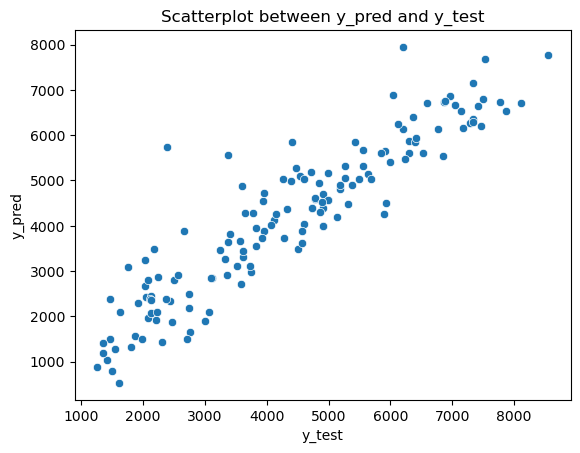

In [41]:
plt.title('Scatterplot between y_pred and y_test')
plt.xlabel("y_test")
plt.ylabel("y_pred")
sns.scatterplot(y= y_pred, x= y_test)

In [45]:
# r2_score on train data

from sklearn.metrics import r2_score
r2_score(y_train, Linear_reg_model.predict(X_train_transformed[Final_features]))

0.8240925155186479

- We see from above graph that y_pred has always values close to y_test hence scatter plot follows linear characteristic. 

In [43]:
# r2_score on test data

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8380856622952364

R2_score on train and test data are similar so we can say model is not overfitting or underfitting.

<a id='inference'></a>
# Inference
- Temperature has high coefficient. So demand increases with temperature.
- Demand will decrease with increase in humidity and windspeed.